# Variabili casuali {#sec-intro_random_var}

**Prerequisiti**

Prima di procedere con il presente capitolo, è essenziale leggere l'@sec-calculus.

**Concetti e competenze chiave**

- Definizione e comprensione delle variabili casuali discrete e continue, e delle loro distribuzioni di probabilità.
- Calcolo e interpretazione del valore atteso per variabili casuali discrete e continue.
- Calcolo e comprensione della varianza e della deviazione standard per variabili casuali discrete e continue.

**Preparazione del Notebook**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import itertools as it
import math
import random
import scipy.stats as stats
import arviz as az
import seaborn as sns
from collections import Counter

In [2]:
seed: int = sum(map(ord, "random_variables"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

Nella data science, lavoriamo spesso con dati influenzati dal caso, che si tratti di un campione casuale, di errori di misurazione o di risultati intrinsecamente casuali. La capacità di quantificare l'incertezza introdotta dalla casualità è uno dei compiti più importanti per un analista di dati. L'inferenza statistica fornisce un quadro teorico, oltre a diversi strumenti pratici, per raggiungere questo obiettivo. Il primo passo consiste nell'imparare a descrivere matematicamente le variabili casuali. In questo capitolo, introduciamo le variabili casuali e le loro proprietà.

## Definizione

Le variabili casuali sono risultati numerici derivanti da processi aleatori. Esse ci consentono di trasformare risultati qualitativi (ad esempio $X = \{\Box, \clubsuit, \diamondsuit, \heartsuit, \spadesuit\}$) in valori numerici, semplificando così l'analisi matematica.

Formalmente, una variabile casuale è definita come una funzione che associa ogni elemento di uno spazio campionario $S$ a un valore in un sottoinsieme dei numeri reali $\mathbb{R}$. Questa definizione consente di esprimere numericamente gli esiti di un fenomeno aleatorio, associando un valore specifico a ciascun possibile risultato dell'esperimento.

::: {#exm-2}
Un esempio è la variabile casuale $X$, che rappresenta il risultato del lancio di un dado. Se definiamo $X = 1$ per indicare che il risultato del lancio è un numero dispari (1, 3 o 5) e $X = 0$ per indicare che il risultato è un numero pari (2, 4 o 6), abbiamo trasformato un'osservazione fisica (il lancio del dado) in un valore numerico che rappresenta una determinata categoria di eventi.
:::

## Tipologie di Variabili Casuali

Le variabili casuali possono essere suddivise in due categorie principali: discrete e continue. Una variabile casuale discreta assume valori all'interno di un insieme finito o al massimo numerabile, il che significa che i suoi possibili esiti possono essere contati, anche se l'insieme è infinito. Al contrario, una variabile casuale continua può assumere un'infinità di valori all'interno di un intervallo, essendo in grado di coprire ogni punto di quell'intervallo senza interruzioni.

## Convenzioni Notazionali

Nella teoria della probabilità, è usuale adottare una specifica convenzione di notazione per le variabili casuali e i loro esiti. Comunemente, si utilizzano le lettere maiuscole, come $X$, per indicare una variabile casuale, ovvero un concetto che rappresenta una serie di possibili esiti di un fenomeno aleatorio. D'altro canto, la corrispondente lettera minuscola, $x$ nel nostro esempio, è impiegata per denotare una specifica realizzazione o un esito particolare che la variabile casuale può assumere. Questa distinzione aiuta a chiarire se si sta parlando della variabile casuale nel suo insieme ($X$) o di un suo specifico valore ($x$).

## Variabili casuali multiple

Nella teoria della probabilità, le variabili casuali spesso interagiscono o si combinano tra loro. Consideriamo l'esempio di tre lanci di una moneta bilanciata, rappresentati da variabili casuali indipendenti $X_1$, $X_2$, e $X_3$. Per ogni lancio:

- $P(X_n = 1)$ (testa) = 0.5,
- $P(X_n = 0)$ (croce) = 0.5,

dove $n = 1, 2, 3$.

Combinando queste variabili, possiamo creare nuove variabili casuali. Ad esempio, definiamo $Z$ come la somma dei risultati:

$$
Z = X_1 + X_2 + X_3.
$$

$Z$ è una variabile casuale discreta che rappresenta il numero totale di teste ottenute nei tre lanci. I suoi possibili valori sono 0, 1, 2, e 3.

Questo esempio illustra come variabili casuali indipendenti possano essere combinate per creare nuove variabili casuali.

## Distribuzione di Probabilità {#sec-fun-mass-prob}

La distribuzione di probabilità è un concetto fondamentale nella teoria della probabilità, che descrive come le probabilità si distribuiscono tra i possibili esiti di una variabile casuale. La sua rappresentazione varia a seconda che si tratti di variabili casuali discrete o continue.

### Variabili Casuali Discrete

Per le variabili casuali discrete, che assumono valori specifici e contabili, la distribuzione di probabilità è rappresentata dalla *funzione di massa di probabilità*, indicata come $P(\cdot)$.

#### Funzione di Massa di Probabilità

La funzione di massa di probabilità assegna una probabilità precisa a ciascun possibile esito della variabile casuale discreta. Ad esempio, per il lancio di un dado equilibrato:

$P(Y = 1) = \frac{1}{6}$.

Questo significa che la probabilità di ottenere "1" in un singolo lancio è 1/6.

#### Istogrammi per Variabili Discrete

Gli istogrammi sono strumenti visivi efficaci per rappresentare la distribuzione di probabilità delle variabili casuali discrete. Per queste variabili, possiamo impostare ciascun bin dell'istogramma in modo che copra un singolo valore della variabile casuale. L'altezza di ogni bin corrisponde alla probabilità di quel valore specifico.

Gli istogrammi ci permettono di identificare rapidamente caratteristiche importanti della distribuzione, come:

1. unimodalità: concentrazione attorno a un singolo punto;
2. multimodalità: concentrazione attorno a più punti;
3. simmetria o asimmetria della distribuzione;
4. dispersione dei valori.

### Variabili Casuali Continue

Per le variabili casuali continue, che possono assumere un'infinità di valori in un intervallo, si utilizza la *funzione di densità di probabilità*, indicata come $p(\cdot)$.

#### Funzione di Densità di Probabilità

La funzione di densità di probabilità non assegna probabilità a singoli valori (che sarebbe zero per una variabile continua), ma determina la probabilità che la variabile si trovi all'interno di un intervallo specifico.

#### Istogrammi per Variabili Continue

Anche per le variabili continue possiamo usare istogrammi, ma in questo caso i bin devono sempre coprire intervalli di valori. Riducendo progressivamente la larghezza dei bin, il profilo dell'istogramma tende a coincidere con la funzione di densità di probabilità della variabile casuale.

### Supporto della Variabile Casuale

Il supporto di una variabile casuale è l'insieme di tutti i valori che la variabile può effettivamente assumere. Ad esempio:

- per un dado a sei facce: {1, 2, 3, 4, 5, 6};
- per una distribuzione gaussiana: l'intero insieme dei numeri reali.

### Assegnazione di Probabilità

- Per variabili discrete: si specifica la probabilità di ogni possibile valore.
- Per variabili continue: si utilizza la densità di probabilità per calcolare la probabilità di intervalli di valori.

La distribuzione di probabilità, sia per variabili discrete che continue, fornisce una descrizione completa del comportamento probabilistico della variabile casuale, permettendo analisi e previsioni accurate in vari campi di applicazione.

::: {#exm-}

Consideriamo l'esperimento casuale costituito dal lancio di due dadi equilibrati. Definiamo la variabile casuale $X$ come la somma dei punti ottenuti dai due dadi.

Lo spazio campionario $S$ è l'insieme di tutte le possibili coppie ordinate $(a,b)$, dove $a$ e $b$ rappresentano i risultati del primo e del secondo dado rispettivamente:

$$
S = {(1,1), (1,2), ..., (1,6), (2,1), (2,2), ..., (2,6), ..., (6,1), (6,2), ..., (6,6)}.
$$

In totale, ci sono 6 × 6 = 36 possibili esiti.

La variabile casuale $X$ è definita come la somma dei punti dei due dadi. Quindi:

$$
X = a + b, \quad \text{dove } (a,b) \in S.
$$

$X$ può assumere valori interi da 2 (1+1) a 12 (6+6).

La distribuzione della variabile casuale $X$ è una funzione che associa a ogni possibile valore di $X$ la sua probabilità. In questo caso, poiché $X$ è discreta, usiamo una funzione di massa di probabilità.

Per calcolare la probabilità di ogni valore di $X$, contiamo il numero di casi favorevoli e lo dividiamo per il numero totale di casi possibili (36).

| X  | Casi favorevoli                  | Numero di casi | Probabilità P(X = x) |
|----|----------------------------------|----------------|----------------------|
| 2  | (1,1)                            | 1              | 1/36                 |
| 3  | (1,2), (2,1)                     | 2              | 2/36 = 1/18          |
| 4  | (1,3), (2,2), (3,1)              | 3              | 3/36 = 1/12          |
| 5  | (1,4), (2,3), (3,2), (4,1)       | 4              | 4/36 = 1/9           |
| 6  | (1,5), (2,4), (3,3), (4,2), (5,1)| 5              | 5/36                 |
| 7  | (1,6), (2,5), (3,4), (4,3), (5,2), (6,1) | 6      | 6/36 = 1/6           |
| 8  | (2,6), (3,5), (4,4), (5,3), (6,2)| 5              | 5/36                 |
| 9  | (3,6), (4,5), (5,4), (6,3)       | 4              | 4/36 = 1/9           |
| 10 | (4,6), (5,5), (6,4)              | 3              | 3/36 = 1/12          |
| 11 | (5,6), (6,5)                     | 2              | 2/36 = 1/18          |
| 12 | (6,6)                            | 1              | 1/36                 |

Questa tabella rappresenta la distribuzione completa della variabile casuale $X$.

In conclusione, la distribuzione di una variabile casuale discreta, come nell'esempio della somma dei punti di due dadi, fornisce una descrizione completa delle proprietà probabilistiche della variabile. Essa associa a ogni possibile valore della variabile la sua probabilità di verificarsi.

In questo caso, la distribuzione ci dice, per esempio, che la probabilità di ottenere una somma di 7 è 1/6, la più alta tra tutti i possibili risultati. Questo è dovuto al fatto che ci sono più combinazioni che producono una somma di 7 rispetto a qualsiasi altro risultato.

La distribuzione ci permette di rispondere a domande come:

- Qual è la probabilità di ottenere una somma pari? (Sommando le probabilità di 2, 4, 6, 8, 10, 12).
- Qual è la probabilità di ottenere una somma maggiore o uguale a 10? (Sommando le probabilità di 10, 11, 12).

La distribuzione di massa di probabilità della variabile casuale $X$ può essere rappresentata visivamente utilizzando un istogramma. Un istogramma permette di vedere immediatamente la probabilità associata a ciascun valore di $X$, rendendo chiaro quali risultati sono più probabili e quali lo sono meno.

Le istruzioni Python necessarie per generare questo istogramma sono fornite di seguito.

:::

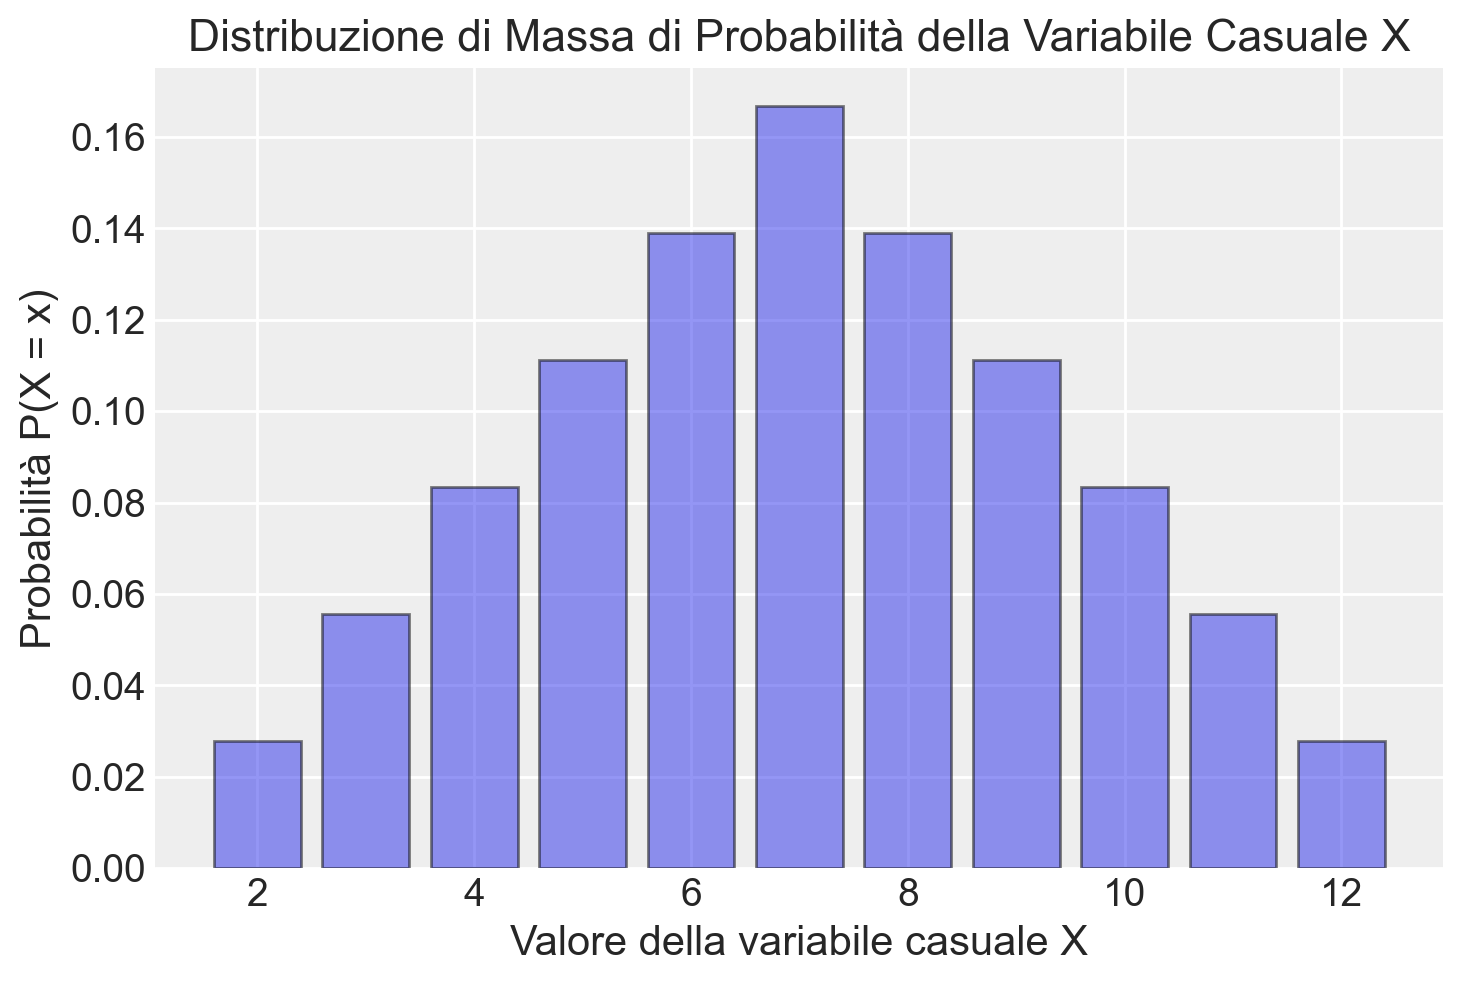

In [5]:
# Valori possibili della variabile casuale X
valori_X = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Probabilità associate a ciascun valore di X
probabilita_X = [
    1 / 36,
    2 / 36,
    3 / 36,
    4 / 36,
    5 / 36,
    6 / 36,
    5 / 36,
    4 / 36,
    3 / 36,
    2 / 36,
    1 / 36,
]

# Creazione dell'istogramma
plt.bar(valori_X, probabilita_X, alpha = 0.5, edgecolor="black")
plt.xlabel("Valore della variabile casuale X")
plt.ylabel("Probabilità P(X = x)")
plt.title("Distribuzione di Massa di Probabilità della Variabile Casuale X")
plt.show()

## Funzione di Distribuzione Cumulativa (CDF)

La Funzione di Distribuzione Cumulativa (CDF) è uno strumento fondamentale nella teoria della probabilità per descrivere la distribuzione di una variabile casuale.

### Definizione

Per una variabile casuale $X$, la funzione di distribuzione cumulativa $F(x)$ è definita come:

$$
F(x) = P(X \leq x),
$$

dove:

- $X$ è la variabile casuale.
- $P(X \leq x)$ rappresenta la probabilità che $X$ assuma un valore minore o uguale a $x$.

In altre parole, $F(x)$ quantifica la probabilità cumulativa dall'estremo inferiore dello spazio di probabilità fino al punto $x$.

### Proprietà della CDF

1. **Monotonia non decrescente**:
   
   - Per $x_1 < x_2$, $F(x_1) \leq F(x_2)$.
   - La CDF non diminuisce mai quando ci si sposta da sinistra a destra lungo l'asse $x$.

2. **Normalizzazione**:
   
   - $\lim_{{x \to -\infty}} F(x) = 0 \quad \text{e} \quad \lim_{{x \to +\infty}} F(x) = 1$.
   - La CDF parte da 0 quando $x$ tende a $-\infty$ e raggiunge 1 quando $x$ tende a $+\infty$.

3. **Continuità a destra**:
   
   - $F(x) = \lim_{{y \to x^+}} F(y)$.
   - La CDF è continua da destra, il che significa che non presenta salti improvvisi quando ci si avvicina a un punto da destra.

### CDF per Variabili Casuali Discrete

Per una variabile casuale discreta $X$, la CDF (anche chiamata *funzione di ripartizione cumulativa*) è definita come:

$$
F(x) = P(X \leq x) = \sum_{x_i \leq x} P(X = x_i),
$$

dove la somma è calcolata su tutti i valori $x_i$ minori o uguali a $x$.

### Importanza e Applicazioni

1. La CDF offre una rappresentazione visiva di come le probabilità si accumulano lungo l'intero intervallo dei possibili valori della variabile casuale.

2. La CDF permette di calcolare facilmente la probabilità che $X$ cada in un intervallo specifico:

$$
P(a < X \leq b) = F(b) - F(a).
$$

3. La CDF è utilizzata in vari metodi di generazione di variabili casuali, come il metodo della trasformazione inversa.

4. Le CDF facilitano il confronto tra diverse distribuzioni di probabilità, consentendo di valutare differenze nelle loro caratteristiche cumulative.

In conclusione, la CDF è uno strumento versatile e potente che fornisce una descrizione completa della distribuzione di probabilità di una variabile casuale, sia essa discreta o continua.

::: {#exm-4}

Nel caso del lancio di due dadi, con la variabile casuale $Z$ definita come la somma dei loro valori, la funzione di distribuzione cumulativa $F(z)$ può essere illustrata come segue:

| $z$ | $P(Z = z)$ | $F(z)$  |
|:-------:|:--------------:|:-----------:|
| 2       | $\frac{1}{36}$ | $\frac{1}{36}$  |
| 3       | $\frac{2}{36}$ | $\frac{3}{36}$  |
| 4       | $\frac{3}{36}$ | $\frac{6}{36}$  |
| 5       | $\frac{4}{36}$ | $\frac{10}{36}$ |
| 6       | $\frac{5}{36}$ | $\frac{15}{36}$ |
| 7       | $\frac{6}{36}$ | $\frac{21}{36}$ |
| 8       | $\frac{5}{36}$ | $\frac{26}{36}$ |
| 9       | $\frac{4}{36}$ | $\frac{30}{36}$ |
| 10      | $\frac{3}{36}$ | $\frac{33}{36}$ |
| 11      | $\frac{2}{36}$ | $\frac{35}{36}$ |
| 12      | $\frac{1}{36}$ | $\frac{36}{36}$ |

In questa tabella:

- $P(Z = z)$ rappresenta la probabilità che la somma dei due dadi sia esattamente $z$.
- $F(z)$ è la funzione di distribuzione cumulativa, che fornisce la probabilità che la somma $Z$ sia minore o uguale a $z$.

Questa tabella mostra come le probabilità cumulative si accumulano per la variabile casuale $Z$, evidenziando la distribuzione delle somme possibili quando si lanciano due dadi. Ad esempio, $F(7) = \frac{21}{36}$ indica che la probabilità che la somma sia 7 o inferiore è $\frac{21}{36}$.

:::

## Trovare la Distribuzione di Probabilità attraverso una Simulazione

La distribuzione di probabilità che abbiamo calcolato in precedenza per il lancio di due dadi è corretta, ma esiste un'alternativa per ottenere un risultato simile: la simulazione. Questo metodo consiste nel ripetere l'esperimento casuale un numero elevato di volte e analizzare le frequenze relative dei risultati ottenuti. In altre parole, simulando l'esperimento migliaia o milioni di volte, possiamo approssimare una distribuzione di probabilità empirica. Questa distribuzione empirica diventa sempre più vicina a quella teorica man mano che aumentiamo il numero di ripetizioni.

La simulazione è una tecnica ampiamente utilizzata in statistica, soprattutto quando la distribuzione di probabilità teorica è difficile da calcolare o troppo complessa per essere trattata analiticamente. Attraverso la simulazione, possiamo esplorare le proprietà di sistemi aleatori complessi e ottenere stime accurate delle probabilità, anche in situazioni in cui un approccio teorico diretto sarebbe impraticabile.

::: {#exm-5}

Nel @sec-python-1 abbiamo visto come creare una funzione che ritorna il risultato del lancio di un dado:

In [17]:
def roll_die():
    """
    returns a random int between 1 and 6
    """
    return rng.choice([1, 2, 3, 4, 5, 6])

Possiamo ora definire una funzione che ritorna la somma dei punti prodotti dal lancio di due dadi. La funzione ha come argomento il numero di ripetizioni di questo esperimento casuale.

In [18]:
def roll_two_dice(n):
    """
    returns a random int between 2 and 12
    """
    rolls = []
    for i in range(n):
        two_dice = roll_die() + roll_die()
        rolls.append(two_dice)
    
    return rolls

Eseguiamo 100,000 ripetizioni dell'esperimento casuale e memorizzo i risultati ottenuti.

In [20]:
nrolls = 100000
res = roll_two_dice(nrolls)
print(*res[1:20])

12 10 7 10 7 9 8 7 5 9 8 7 4 9 7 2 10 10 5


Creiamo un DataFrame che contiene la variabile `y` corrispondente ai risultati delle 10,000 ripetizioni dell'esperimento casuale.

In [21]:
df = pd.DataFrame()
df["y"] = res 

Utilizziamo dunque il metodo `value_counts()`, che può essere applicato a un DataFrame, come abbiamo visto nel @sec-freq-distribution, per trovare le frequenze assolute di ciascuno dei possibili risultati dell'esperimento casuale (cioè, 2, 3, ..., 12). Dividendo per il numero totale delle ripetizioni, otterremo una stima empirica della probabilità. Si noti che i risultati saranno simili a quelli teorici ottenuti in precedenza.

In [22]:
abs_freqs = df["y"].value_counts().sort_index()
px = abs_freqs / nrolls
list(zip(list(range(2, 13)), px))

[(2, 0.02775),
 (3, 0.05625),
 (4, 0.08331),
 (5, 0.11109),
 (6, 0.13915),
 (7, 0.16824),
 (8, 0.13751),
 (9, 0.11167),
 (10, 0.08238),
 (11, 0.05567),
 (12, 0.02698)]

:::

## Informazioni sull'Ambiente di Sviluppo

In [19]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Tue May 21 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.22.2

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

scipy     : 1.13.0
arviz     : 0.18.0
matplotlib: 3.8.4
pandas    : 2.2.2
seaborn   : 0.13.2
numpy     : 1.26.4

Watermark: 2.4.3

